# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# IMPORT DATASETS

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [4]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [6]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unuse Feature

In [7]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [8]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [9]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [10]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [11]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [12]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [13]:
clean_train_df

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,2.066863,0.273076,2.091864,0.404131,3.891820,510.0,3.186353,5.484797,90.4
1,140.0,41.0,2.484907,0.139762,2.014903,0.667829,2.995732,300.0,2.251292,5.252273,130.0
2,160.0,51.0,2.302585,0.371564,2.312535,1.252763,2.564949,370.0,3.258097,5.442418,160.0
3,46.0,13.0,1.360977,0.113329,1.308333,0.357674,2.001480,110.0,1.791759,4.584967,41.0
5,154.0,49.2,3.951244,0.223144,2.451005,0.438255,3.964615,619.0,4.615121,5.826000,198.0
...,...,...,...,...,...,...,...,...,...,...,...
6393,115.0,27.9,2.766319,0.095310,2.322388,1.360977,3.091042,292.0,1.629241,5.384495,113.0
6395,180.0,58.0,3.713572,0.165514,3.258097,1.526056,3.135494,540.0,3.891820,5.993961,219.0
6396,44.0,5.7,1.386294,0.113329,1.547563,0.385262,1.931521,100.0,0.615186,4.043051,30.0
6397,138.0,40.3,3.380995,0.095310,2.721295,2.261763,3.465736,438.0,2.928524,5.707110,159.0


In [14]:
clean_train_df.describe()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,154.255494,46.671512,3.201088,0.253165,2.529553,1.156416,3.511040,531.407192,3.352391,5.717488,181.621282
std,64.660236,28.259291,1.015936,0.196209,0.812991,0.669267,0.692113,266.130708,1.140360,0.496596,105.101574
min,21.000000,1.000000,0.457425,0.047837,0.049742,0.002297,0.832909,40.000000,0.131028,3.024320,3.500000
25%,110.000000,24.000000,2.397895,0.122218,2.054124,0.604316,3.044522,320.000000,2.553321,5.353040,99.000000
50%,150.000000,41.200000,3.218876,0.182322,2.639057,1.098612,3.496508,480.000000,3.367296,5.707110,160.000000
75%,190.000000,65.000000,3.970292,0.314811,3.091042,1.620376,3.970292,690.000000,4.219508,6.066108,250.000000
max,355.000000,140.000000,6.523562,2.302585,10.165890,4.044804,10.373522,1350.000000,6.311735,7.741099,487.000000


# FEATURE ENGINEERING

## LABEL CORRELATION

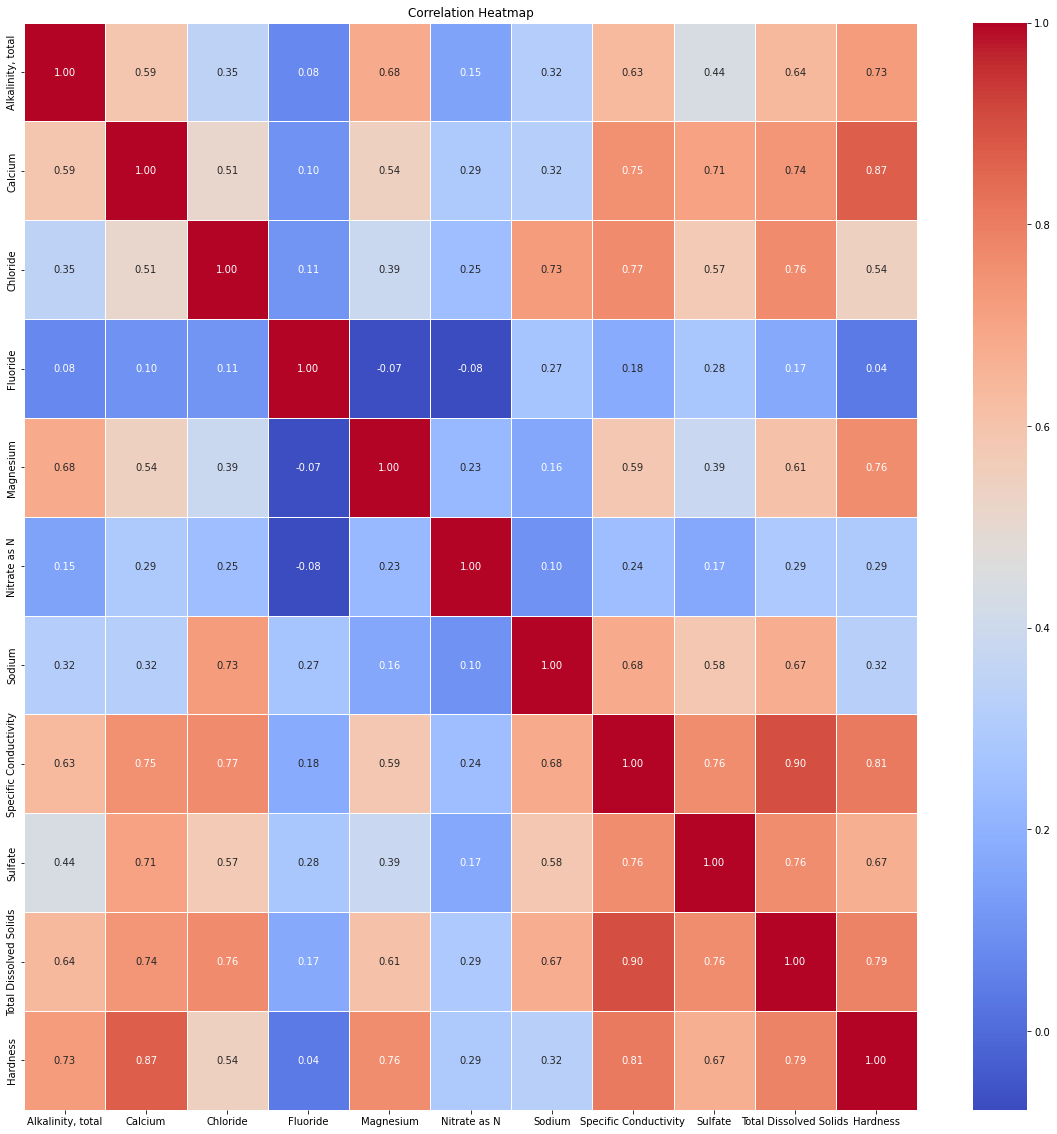

In [15]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MODEL CREATION

## Split Feature

In [16]:
X = train_df.drop(columns=['Hardness'])
y = train_df['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [17]:
y.describe()

count    6400.000000
mean      216.148203
std       161.431526
min         2.500000
25%       101.000000
50%       180.000000
75%       281.000000
max      1901.000000
Name: Hardness, dtype: float64

## Linear Regression

In [18]:
# Scale the features
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)
y_val_pred = linear_reg.predict(X_val)

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print(r2)

0.9124644481700032


## Random Forest

In [20]:
best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1} 

In [21]:
from sklearn.ensemble import RandomForestRegressor


best_params['random_state'] = 42
random_forest = RandomForestRegressor(**best_params)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

In [22]:
r2 = r2_score(y_train, y_pred)
print(r2)

0.9874729199454221


## KNN

In [23]:
from sklearn import neighbors

rmse_val = [] 
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_val) 
    r2 = r2_score(y_val, y_pred)
    print(r2)

0.6914058841324628
0.7683241238385222
0.7752946624404238
0.7937559926607152
0.8035613755781128
0.8162099946419373
0.8097268503385763
0.8036862193706299
0.8072747629740007
0.8143245399767691
0.8099791409747046
0.8083892020037934
0.807273601569975
0.8084491698294257
0.8066609788492093
0.8050311233133222
0.8012550245860461
0.8024463727219036
0.8049619742056842
0.8056529925826081


In [59]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 8)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)

In [62]:
from sklearn.ensemble import BaggingRegressor

bag_knn = BaggingRegressor(estimator=knn, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.8553822726732188, bag_knn r2 val = 0.8148355793355351, bag_knn r2 diff = 0.04054669333768368


## SVR

In [42]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [63]:
from sklearn.ensemble import BaggingRegressor

bag_svr = BaggingRegressor(estimator=svr, n_estimators=10, random_state=42)

bag_svr.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_svr = bag_svr.predict(X_train)
y_predval_bag_svr = bag_svr.predict(X_val)
r2train_bag_svr = r2_score(y_train, y_predtrain_bag_svr)
r2val_bag_svr = r2_score(y_val, y_predval_bag_svr)
print(f"bag_svr r2 train =  {r2train_bag_svr}, bag_svr r2 val = {r2val_bag_svr}, bag_svr r2 diff = {r2train_bag_svr-r2val_bag_svr}")

bag_svr r2 train =  0.6059423886835764, bag_svr r2 val = 0.6197282028594615, bag_svr r2 diff = -0.013785814175885092


## STACK: RF, KNN

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('Random Forest', random_forest),
              ('KNN', knn)]

stacking_regressor_rf_knn = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [25]:
stacking_regressor_rf_knn.fit(X_train, y_train) 
y_pred = stacking_regressor_rf_knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9094403013285328


## STACK: KNN, RF

In [26]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('KNN', knn),
              ('Random Forest', random_forest)]

stacking_regressor_knn_rf = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [27]:
stacking_regressor_knn_rf.fit(X_train, y_train) 
y_pred = stacking_regressor_knn_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9094403012819935


## XGB

In [28]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(n_estimators=25, 
                         objective="reg:squarederror", 
                         eval_metric="rmse",
                         early_stopping_rounds=2, 
                         learning_rate=0.2, 
                         random_state=0)

xgb_r.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          verbose=5)

[0]	validation_0-rmse:132.27989	validation_1-rmse:136.97766
[5]	validation_0-rmse:60.02178	validation_1-rmse:66.30036
[10]	validation_0-rmse:39.71821	validation_1-rmse:47.82295
[15]	validation_0-rmse:32.47075	validation_1-rmse:45.04887
[20]	validation_0-rmse:29.79959	validation_1-rmse:44.43256
[24]	validation_0-rmse:28.81389	validation_1-rmse:44.23375


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [29]:
y_pred = xgb_r.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9290308494441567


## STACK: RF, XGBR

In [37]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

stacking_regressor_rf_xgb = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=42, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [31]:
stacking_regressor_xgb_rf = StackingCVRegressor(regressors=(xgb, rf),
                            meta_regressor=rf, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_xgb_rf.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=RandomForestRegressor(), random_state=42,
                    regressors=(XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_...
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                                RandomForestRegressor()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [32]:
y_pred = stacking_regressor_rf_xgb.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9259088483581238


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [33]:
y_pred = stacking_regressor_xgb_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9078306407838428


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [69]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('svr', svr), ('bag_knn', bag_knn), ('stack', stacking_regressor_rf_xgb)])

voting.fit(X_train, y_train)

VotingRegressor(estimators=[('svr', SVR()),
                            ('bag_knn',
                             BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=8),
                                              random_state=42)),
                            ('stack',
                             StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                             booster=None,
                                                                             callbacks=None,
                                                                             colsample_bylevel=None,
                                                                             colsample_bynode=None,
                                                                             colsample_bytree=None,
                                                                             device=None,
                                                                             early_stopping_rounds=None,
                                                                             enable_cat...
                                                                          learning_rate=None,
                                                                          max_bin=None,
                                                                          max_cat_threshold=None,
                                                                          max_cat_to_onehot=None,
                                                                          max_delta_step=None,
                                                                          max_depth=None,
                                                                          max_leaves=None,
                                                                          min_child_weight=None,
                                                                          missing=nan,
                                                                          monotone_constraints=None,
                                                                          multi_strategy=None,
                                                                          n_estimators=None,
                                                                          n_jobs=None,
                                                                          num_parallel_tree=None,
                                                                          random_state=42, ...)),
                                                 shuffle=False,
                                                 store_train_meta_features=True,
                                                 use_features_in_secondary=True))])

In [72]:
from sklearn.ensemble import BaggingRegressor

bag_stack = BaggingRegressor(estimator=stacking_regressor_rf_xgb, n_estimators=10, random_state=42)

bag_stack.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_stack = bag_stack.predict(X_train)
y_predval_bag_stack = bag_stack.predict(X_val)
r2train_bag_stack = r2_score(y_train, y_predtrain_bag_stack)
r2val_bag_stack = r2_score(y_val, y_predval_bag_stack)
print(f"bag_stack r2 train =  {r2train_bag_stack}, bag_stack r2 val = {r2val_bag_stack}, bag_stack r2 diff = {r2train_bag_stack-r2val_bag_stack}")

c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users

bag_stack r2 train =  0.9727912939722412, bag_stack r2 val = 0.928793126135131, bag_stack r2 diff = 0.04399816783711019


# SUBMISSION

In [73]:
test_pred = bag_stack.predict(test_df.drop(columns=["id"]))
predicting_model = "bag_stack"

submission_df = pd.DataFrame(test_df["id"])
submission_df["Hardness"] = test_pred

submission_df

,id,Hardness
0,6400,87.624336
1,6401,129.239304
2,6402,110.672997
3,6403,97.469223
4,6404,325.487701
...,...,...
1596,7996,87.626686
1597,7997,68.092522
1598,7998,197.172333
1599,7999,251.871872


In [74]:
from datetime import datetime
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)